# IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# GETTING THE DATASET/LOADING THE DATASET

In [2]:
petrol = pd.read_csv("petrol.csv")

# DISPLAYING THE DATASET

In [3]:
petrol

,PERIOD,DATE,DELHI (P),MUMBAI(P),CHENNAI(P),KOLKATA(P)
0,1,16-Jun-17,65.48,76.70,68.02,68.03
1,2,17-Jun-17,65.23,76.46,67.76,67.84
2,3,18-Jun-17,64.91,76.14,67.42,67.58
3,4,19-Jun-17,64.65,75.88,67.14,67.37
4,5,20-Jun-17,64.55,75.78,67.04,67.30
...,...,...,...,...,...,...
576,577,13-Jan-19,69.75,75.39,72.39,71.87
577,578,14-Jan-19,70.13,75.77,72.79,72.24
578,579,15-Jan-19,70.41,76.05,73.08,72.52
579,580,16-Jan-19,70.33,75.97,73.00,72.44


## DROPPING AN OBSOLETE COLUMN

In [4]:
petrol = petrol.drop(["PERIOD"], axis = 1)

In [5]:
petrol

,DATE,DELHI (P),MUMBAI(P),CHENNAI(P),KOLKATA(P)
0,16-Jun-17,65.48,76.70,68.02,68.03
1,17-Jun-17,65.23,76.46,67.76,67.84
2,18-Jun-17,64.91,76.14,67.42,67.58
3,19-Jun-17,64.65,75.88,67.14,67.37
4,20-Jun-17,64.55,75.78,67.04,67.30
...,...,...,...,...,...
576,13-Jan-19,69.75,75.39,72.39,71.87
577,14-Jan-19,70.13,75.77,72.79,72.24
578,15-Jan-19,70.41,76.05,73.08,72.52
579,16-Jan-19,70.33,75.97,73.00,72.44


# Convert the DATE column to datetime format

## Sort the dataframe by DATE column

In [6]:
petrol['DATE'] = pd.to_datetime(petrol['DATE'])
petrol.sort_values('DATE', inplace=True)

C:\Users\Deep\AppData\Local\Temp\ipykernel_20236\2111331255.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  petrol['DATE'] = pd.to_datetime(petrol['DATE'])


# Calculate the average prices for each city

In [7]:
petrol['AVG_DELHI'] = petrol['DELHI (P)'].rolling(window=7).mean().fillna(method='bfill')
petrol['AVG_MUMBAI'] = petrol['MUMBAI(P)'].rolling(window=7).mean().fillna(method='bfill')
petrol['AVG_CHENNAI'] = petrol['CHENNAI(P)'].rolling(window=7).mean().fillna(method='bfill')
petrol['AVG_KOLKATA'] = petrol['KOLKATA(P)'].rolling(window=7).mean().fillna(method='bfill')

# Print the updated dataframe

In [8]:
petrol

,DATE,DELHI (P),MUMBAI(P),CHENNAI(P),KOLKATA(P),AVG_DELHI,AVG_MUMBAI,AVG_CHENNAI,AVG_KOLKATA
0,2017-06-16,65.48,76.70,68.02,68.03,64.830000,76.061429,67.335714,67.518571
1,2017-06-17,65.23,76.46,67.76,67.84,64.830000,76.061429,67.335714,67.518571
2,2017-06-18,64.91,76.14,67.42,67.58,64.830000,76.061429,67.335714,67.518571
3,2017-06-19,64.65,75.88,67.14,67.37,64.830000,76.061429,67.335714,67.518571
4,2017-06-20,64.55,75.78,67.04,67.30,64.830000,76.061429,67.335714,67.518571
...,...,...,...,...,...,...,...,...,...
576,2019-01-13,69.75,75.39,72.39,71.87,68.922857,74.575714,71.515714,71.055714
577,2019-01-14,70.13,75.77,72.79,72.24,69.155714,74.805714,71.761429,71.284286
578,2019-01-15,70.41,76.05,73.08,72.52,69.428571,75.075714,72.048571,71.552857
579,2019-01-16,70.33,75.97,73.00,72.44,69.690000,75.334286,72.324286,71.810000


# TO DISPLAY THE FIRST 5 ROWS OF THE DATASET

In [9]:
petrol.head()

,DATE,DELHI (P),MUMBAI(P),CHENNAI(P),KOLKATA(P),AVG_DELHI,AVG_MUMBAI,AVG_CHENNAI,AVG_KOLKATA
0,2017-06-16,65.48,76.70,68.02,68.03,64.83,76.061429,67.335714,67.518571
1,2017-06-17,65.23,76.46,67.76,67.84,64.83,76.061429,67.335714,67.518571
2,2017-06-18,64.91,76.14,67.42,67.58,64.83,76.061429,67.335714,67.518571
3,2017-06-19,64.65,75.88,67.14,67.37,64.83,76.061429,67.335714,67.518571
4,2017-06-20,64.55,75.78,67.04,67.30,64.83,76.061429,67.335714,67.518571


# TO DISPLAY THE LAST 5 ROWS OF THE DATASET

In [10]:
petrol.tail()

,DATE,DELHI (P),MUMBAI(P),CHENNAI(P),KOLKATA(P),AVG_DELHI,AVG_MUMBAI,AVG_CHENNAI,AVG_KOLKATA
576,2019-01-13,69.75,75.39,72.39,71.87,68.922857,74.575714,71.515714,71.055714
577,2019-01-14,70.13,75.77,72.79,72.24,69.155714,74.805714,71.761429,71.284286
578,2019-01-15,70.41,76.05,73.08,72.52,69.428571,75.075714,72.048571,71.552857
579,2019-01-16,70.33,75.97,73.00,72.44,69.690000,75.334286,72.324286,71.810000
580,2019-01-17,70.47,76.11,73.15,72.58,69.917143,75.560000,72.564286,72.034286


# TO FIND THE SHAPE OF THE DATASET

In [11]:
petrol.shape

(581, 9)

In [12]:
print("Number of Rows",petrol.shape[0])
print("Number of Columns",petrol.shape[1])

Number of Rows 581
Number of Columns 9


# GET INFORMATION ABOUT OUR DATASET

In [13]:
petrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         581 non-null    datetime64[ns]
 1   DELHI (P)    581 non-null    float64       
 2   MUMBAI(P)    581 non-null    float64       
 3   CHENNAI(P)   581 non-null    float64       
 4   KOLKATA(P)   581 non-null    float64       
 5   AVG_DELHI    581 non-null    float64       
 6   AVG_MUMBAI   581 non-null    float64       
 7   AVG_CHENNAI  581 non-null    float64       
 8   AVG_KOLKATA  581 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 41.0 KB


In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


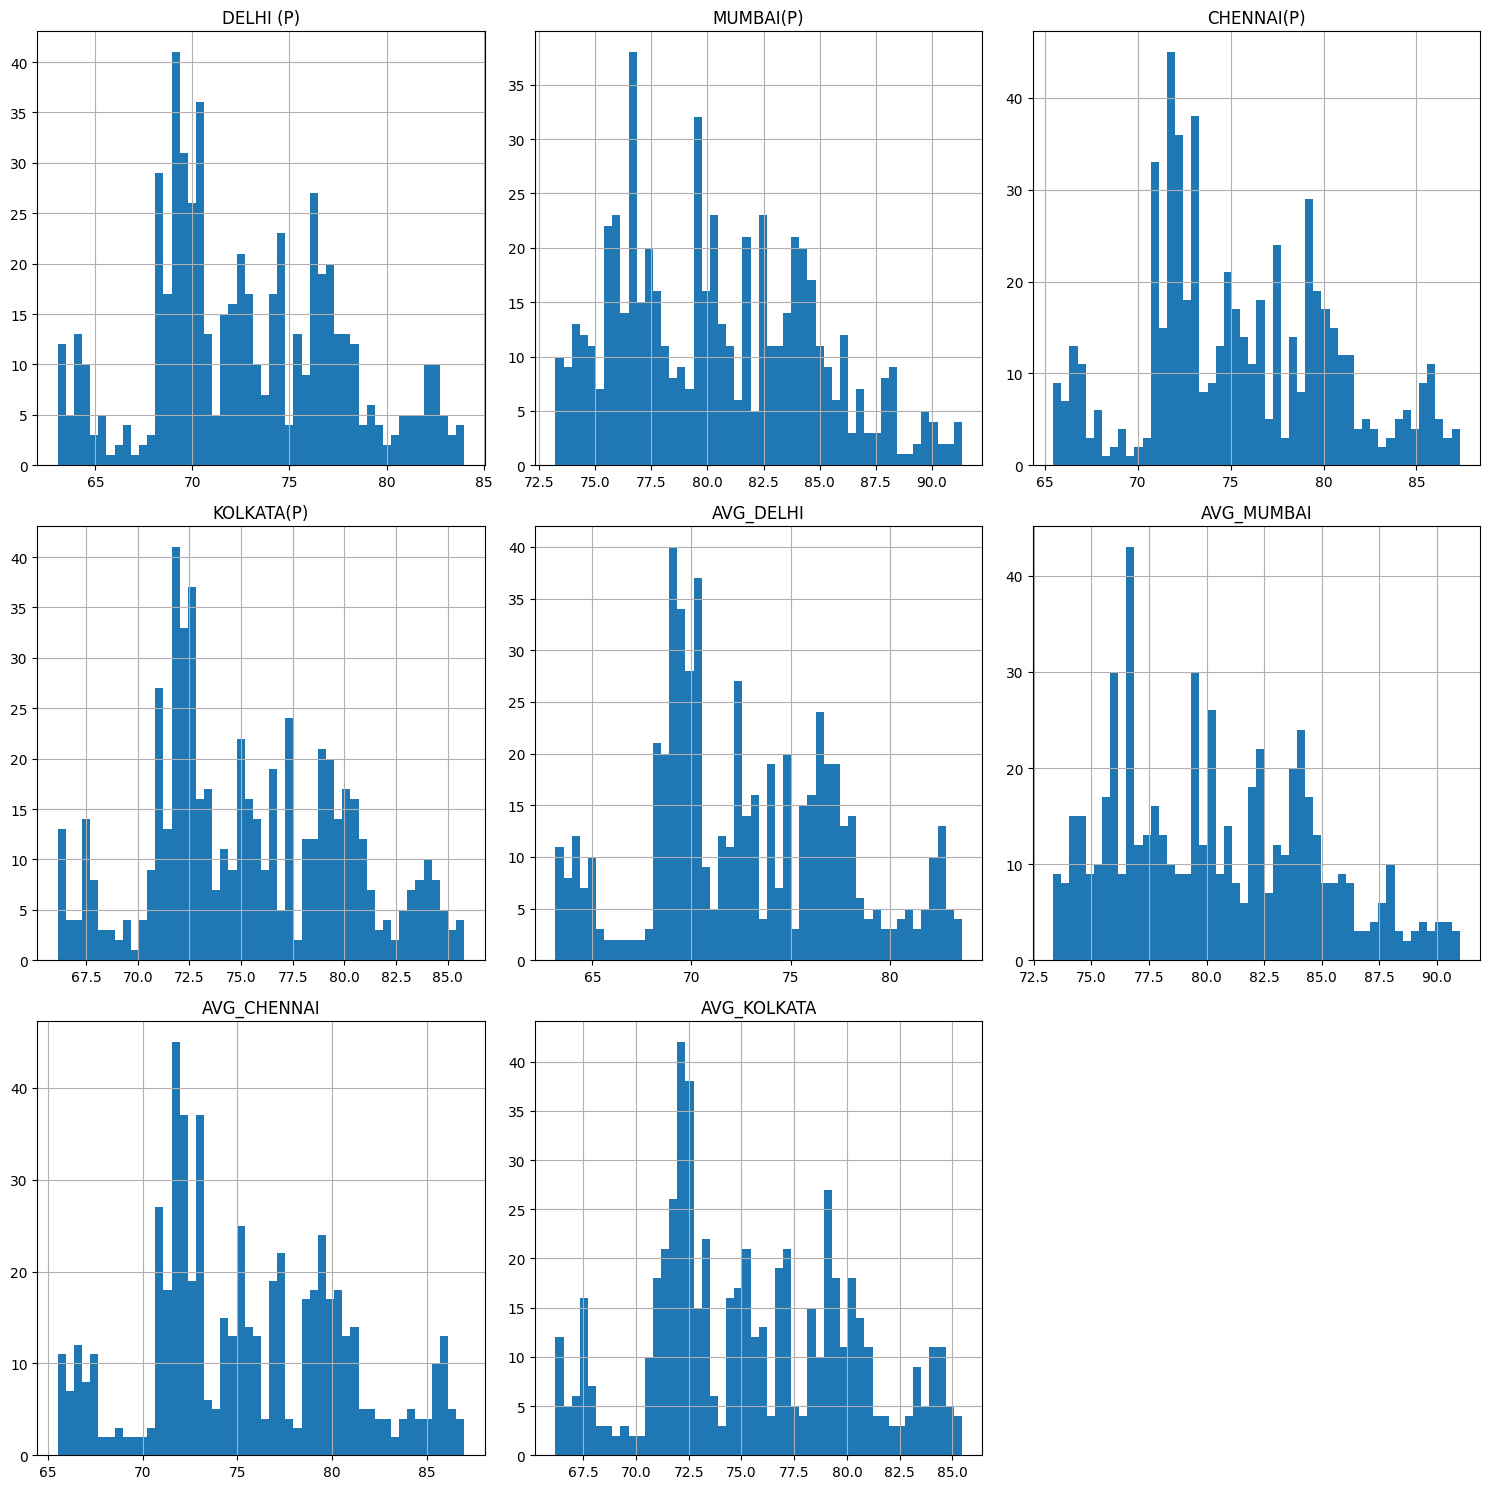

In [15]:
petrol.drop('DATE', axis=1).hist(bins=50, figsize=(15, 15))
plt.tight_layout()
plt.show()

# CHECKING NULL VALUES IN THE DATASET

In [16]:
petrol.isnull()

,DATE,DELHI (P),MUMBAI(P),CHENNAI(P),KOLKATA(P),AVG_DELHI,AVG_MUMBAI,AVG_CHENNAI,AVG_KOLKATA
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
576,False,False,False,False,False,False,False,False,False
577,False,False,False,False,False,False,False,False,False
578,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False


In [17]:
petrol.isnull().sum()

DATE           0
DELHI (P)      0
MUMBAI(P)      0
CHENNAI(P)     0
KOLKATA(P)     0
AVG_DELHI      0
AVG_MUMBAI     0
AVG_CHENNAI    0
AVG_KOLKATA    0
dtype: int64

# DESCRIPTION OF THE DATASET

In [18]:
petrol.describe()

,DATE,DELHI (P),MUMBAI(P),CHENNAI(P),KOLKATA(P),AVG_DELHI,AVG_MUMBAI,AVG_CHENNAI,AVG_KOLKATA
count,581,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,2018-04-02 00:00:00,72.795318,80.435818,75.533356,75.405542,72.766140,80.435527,75.503290,75.379592
min,2017-06-16 00:00:00,63.060000,73.230000,65.440000,66.120000,63.134286,73.332857,65.518571,66.181429
25%,2017-11-08 00:00:00,69.280000,76.640000,71.850000,72.010000,69.304286,76.625714,71.844286,72.004286
50%,2018-04-02 00:00:00,72.300000,80.070000,74.980000,75.000000,72.311429,80.101429,74.990000,75.010000
75%,2018-08-25 00:00:00,76.430000,83.760000,79.330000,79.100000,76.428571,83.795714,79.377143,79.145714
max,2019-01-17 00:00:00,84.000000,91.340000,87.330000,85.800000,83.648571,90.997143,86.964286,85.452857
std,NaN,4.861170,4.292771,5.098497,4.661657,4.884159,4.278738,5.121386,4.683336


# DISPLAYING THE UNIQUE CATEGORICAL VALUES FROM EACH COLOUMN

In [19]:
petrol['DELHI (P)'].unique()

array([65.48, 65.23, 64.91, 64.65, 64.55, 64.44, 64.23, 63.99, 63.71,
       63.55, 63.46, 63.47, 63.31, 63.09, 63.06, 63.13, 63.08, 63.19,
       63.33, 63.65, 63.83, 63.93, 63.91, 63.89, 64.03, 64.11, 64.15,
       64.21, 64.25, 64.28, 64.3 , 64.4 , 64.53, 64.57, 64.59, 64.69,
       64.87, 65.  , 65.26, 65.4 , 65.47, 65.69, 66.  , 66.28, 66.51,
       66.66, 66.75, 66.81, 66.96, 67.27, 67.5 , 67.76, 67.95, 68.08,
       68.14, 68.24, 68.29, 68.37, 68.38, 68.54, 68.67, 68.73, 68.88,
       69.01, 69.02, 69.06, 69.09, 69.12, 69.15, 69.26, 69.43, 69.55,
       69.66, 69.71, 69.8 , 69.89, 70.03, 70.17, 70.3 , 70.38, 70.39,
       70.43, 70.48, 70.51, 70.52, 70.47, 70.42, 70.41, 70.46, 70.56,
       70.66, 70.76, 70.83, 70.88, 68.36, 68.35, 68.39, 68.45, 68.48,
       68.43, 68.33, 68.26, 68.4 , 68.44, 68.58, 68.6 , 68.62, 68.65,
       68.72, 68.84, 68.92, 69.07, 69.13, 69.14, 69.25, 69.34, 69.47,
       69.69, 69.85, 69.81, 69.78, 69.73, 69.68, 69.65, 69.61, 69.57,
       69.54, 69.51,

In [20]:
petrol['MUMBAI(P)'].unique()

array([76.7 , 76.46, 76.14, 75.88, 75.78, 75.79, 75.68, 75.46, 75.23,
       74.95, 74.79, 74.71, 74.56, 74.3 , 74.28, 74.35, 74.41, 74.54,
       74.67, 74.86, 75.04, 73.27, 73.25, 73.23, 73.37, 73.45, 73.49,
       73.54, 73.59, 73.61, 73.63, 73.74, 73.87, 73.9 , 73.91, 73.92,
       74.02, 74.2 , 74.33, 74.58, 74.63, 74.85, 75.15, 75.43, 75.66,
       75.8 , 75.89, 75.96, 76.1 , 76.41, 76.64, 76.89, 77.09, 77.21,
       77.27, 77.37, 77.42, 77.5 , 77.51, 77.66, 77.79, 77.86, 78.  ,
       78.13, 78.14, 78.18, 78.22, 78.24, 78.28, 78.38, 78.54, 78.67,
       78.78, 78.82, 78.92, 79.  , 79.14, 79.28, 79.41, 79.48, 79.5 ,
       79.54, 79.59, 79.62, 79.63, 79.58, 79.53, 79.52, 79.57, 79.67,
       79.77, 79.87, 79.94, 79.99, 77.49, 77.48, 77.52, 77.58, 75.59,
       75.57, 75.55, 75.5 , 75.45, 75.41, 75.38, 75.52, 75.56, 75.69,
       75.71, 75.73, 75.76, 75.83, 75.95, 76.03, 76.18, 76.24, 76.25,
       76.36, 76.45, 76.57, 76.65, 76.79, 76.9 , 76.95, 76.91, 76.88,
       76.83, 76.78,

In [21]:
petrol['CHENNAI(P)'].unique()

array([68.02, 67.76, 67.42, 67.14, 67.04, 66.93, 66.7 , 66.45, 66.15,
       65.98, 65.89, 65.9 , 65.74, 65.46, 65.44, 65.51, 65.58, 65.72,
       65.86, 66.05, 66.25, 66.38, 66.36, 66.34, 66.49, 66.57, 66.61,
       66.67, 66.72, 66.75, 66.77, 66.88, 67.01, 67.05, 67.06, 67.07,
       67.18, 67.37, 67.51, 67.78, 67.71, 68.34, 68.64, 68.88, 69.03,
       69.13, 69.2 , 69.35, 69.68, 69.92, 70.19, 70.4 , 70.53, 70.59,
       70.7 , 70.76, 70.83, 70.85, 71.01, 71.15, 71.22, 71.37, 71.51,
       71.52, 71.56, 71.6 , 71.62, 71.66, 71.78, 71.95, 72.08, 72.2 ,
       72.25, 72.34, 72.44, 72.58, 72.73, 72.87, 72.95, 72.97, 73.01,
       73.06, 73.09, 73.1 , 73.05, 73.  , 72.99, 73.04, 73.15, 73.25,
       73.36, 73.43, 73.48, 70.82, 70.86, 70.93, 70.96, 70.9 , 70.8 ,
       70.73, 70.87, 70.92, 71.06, 71.08, 71.1 , 71.14, 71.21, 71.34,
       71.42, 71.58, 71.64, 71.65, 71.77, 71.86, 72.  , 72.23, 72.35,
       72.4 , 72.36, 72.33, 72.27, 72.22, 72.19, 72.15, 72.1 , 72.07,
       72.04, 72.06,

In [22]:
petrol['KOLKATA(P)'].unique()

array([68.03, 67.84, 67.58, 67.37, 67.3 , 67.21, 67.04, 66.86, 66.64,
       66.51, 66.44, 66.45, 66.32, 66.14, 66.12, 66.18, 66.23, 66.33,
       66.58, 66.73, 67.4 , 67.38, 67.48, 67.55, 67.62, 67.66, 67.68,
       67.69, 67.77, 67.88, 67.91, 67.92, 68.  , 68.14, 68.24, 68.45,
       68.56, 68.61, 68.78, 69.03, 69.24, 69.43, 69.54, 69.61, 69.66,
       69.78, 70.07, 70.29, 70.55, 70.74, 70.86, 70.92, 71.02, 71.07,
       71.14, 71.16, 71.31, 71.44, 71.5 , 71.64, 71.77, 71.78, 71.82,
       71.86, 71.88, 71.92, 72.02, 72.18, 72.3 , 72.41, 72.46, 72.55,
       72.64, 72.78, 72.91, 73.05, 73.12, 73.13, 73.17, 73.22, 73.25,
       73.26, 73.21, 73.16, 73.15, 73.2 , 73.3 , 73.4 , 73.5 , 73.57,
       73.62, 71.13, 71.17, 71.23, 71.26, 71.21, 71.11, 71.04, 71.18,
       71.22, 71.36, 71.38, 71.4 , 71.43, 71.49, 71.61, 71.69, 71.84,
       71.9 , 72.01, 72.1 , 72.23, 72.31, 72.44, 72.6 , 72.56, 72.53,
       72.48, 72.43, 72.4 , 72.37, 72.33, 72.27, 72.29, 72.24, 72.19,
       72.17, 72.12,

# DATA ANALYSIS & VISUALISATION

## Plot line charts for each city's price over time

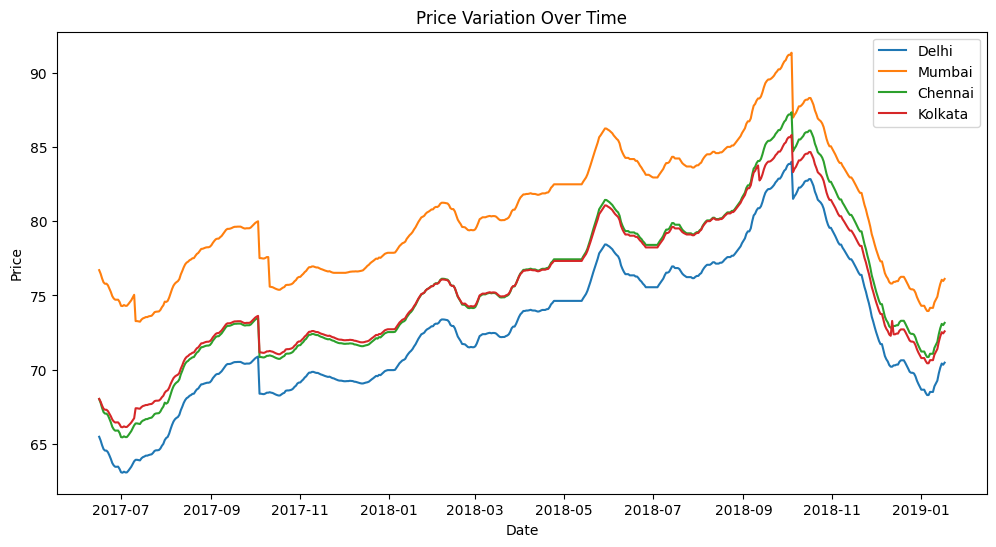

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(petrol['DATE'], petrol['DELHI (P)'], label='Delhi')
plt.plot(petrol['DATE'], petrol['MUMBAI(P)'], label='Mumbai')
plt.plot(petrol['DATE'], petrol['CHENNAI(P)'], label='Chennai')
plt.plot(petrol['DATE'], petrol['KOLKATA(P)'], label='Kolkata')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Variation Over Time')
plt.legend()
plt.show()

## Create a boxplot for each city's price

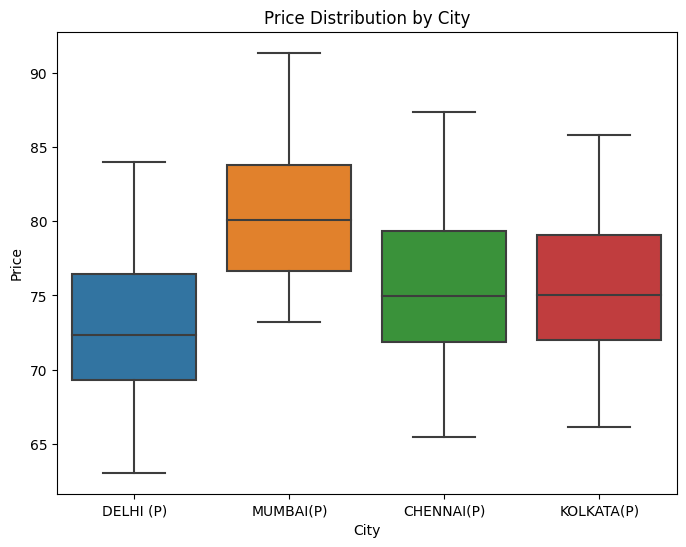

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=petrol[['DELHI (P)', 'MUMBAI(P)', 'CHENNAI(P)', 'KOLKATA(P)']])
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Price Distribution by City')
plt.show()

## Create a correlation heatmap

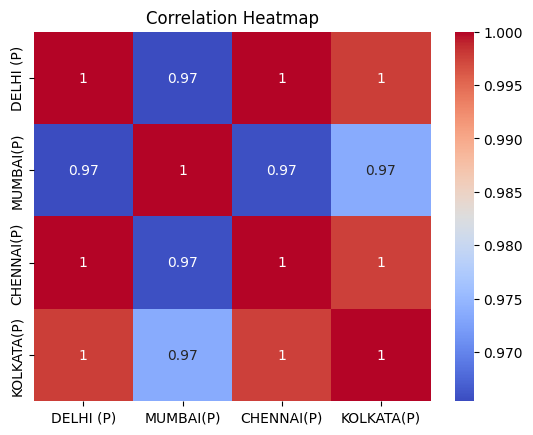

In [25]:
corr_matrix = petrol[['DELHI (P)', 'MUMBAI(P)', 'CHENNAI(P)', 'KOLKATA(P)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# SPLITTING OF DATASET FOR TRAINING/TESTING

## Set the random state for reproducibility

In [26]:
random_state = 42

## Split the data for Delhi

In [27]:
X_delhi = petrol.drop(['DATE', 'DELHI (P)'], axis=1)
y_delhi = petrol['DELHI (P)']
X_train_delhi, X_test_delhi, y_train_delhi, y_test_delhi = train_test_split(X_delhi, y_delhi, test_size=0.2, random_state=random_state)

## Print the shapes of the resulting datasets for Delhi

In [28]:
print("Delhi - Training data shape:", X_train_delhi.shape)
print("Delhi - Testing data shape:", X_test_delhi.shape)
print("Delhi - Training target shape:", y_train_delhi.shape)
print("Delhi - Testing target shape:", y_test_delhi.shape)

Delhi - Training data shape: (464, 7)
Delhi - Testing data shape: (117, 7)
Delhi - Training target shape: (464,)
Delhi - Testing target shape: (117,)


## Split the data for Mumbai

In [29]:
X_mumbai = petrol.drop(['DATE', 'MUMBAI(P)'], axis=1)
y_mumbai = petrol['MUMBAI(P)']
X_train_mumbai, X_test_mumbai, y_train_mumbai, y_test_mumbai = train_test_split(X_mumbai, y_mumbai, test_size=0.2, random_state=random_state)

## Print the shapes of the resulting datasets for Mumbai

In [30]:
print("Mumbai - Training data shape:", X_train_mumbai.shape)
print("Mumbai - Testing data shape:", X_test_mumbai.shape)
print("Mumbai - Training target shape:", y_train_mumbai.shape)
print("Mumbai - Testing target shape:", y_test_mumbai.shape)

Mumbai - Training data shape: (464, 7)
Mumbai - Testing data shape: (117, 7)
Mumbai - Training target shape: (464,)
Mumbai - Testing target shape: (117,)


## Split the data for Chennai

In [31]:
X_chennai = petrol.drop(['DATE', 'CHENNAI(P)'], axis=1)
y_chennai = petrol['CHENNAI(P)']
X_train_chennai, X_test_chennai, y_train_chennai, y_test_chennai = train_test_split(X_chennai, y_chennai, test_size=0.2, random_state=random_state)

## Print the shapes of the resulting datasets for Chennai

In [32]:
print("Chennai - Training data shape:", X_train_chennai.shape)
print("Chennai - Testing data shape:", X_test_chennai.shape)
print("Chennai - Training target shape:", y_train_chennai.shape)
print("Chennai - Testing target shape:", y_test_chennai.shape)

Chennai - Training data shape: (464, 7)
Chennai - Testing data shape: (117, 7)
Chennai - Training target shape: (464,)
Chennai - Testing target shape: (117,)


## Split the data for Kolkata

In [33]:
X_kolkata = petrol.drop(['DATE', 'KOLKATA(P)'], axis=1)
y_kolkata = petrol['KOLKATA(P)']
X_train_kolkata, X_test_kolkata, y_train_kolkata, y_test_kolkata = train_test_split(X_kolkata, y_kolkata, test_size=0.2, random_state=random_state)

## Print the shapes of the resulting datasets for Kolkata

In [34]:
print("Kolkata - Training data shape:", X_train_kolkata.shape)
print("Kolkata - Testing data shape:", X_test_kolkata.shape)
print("Kolkata - Training target shape:", y_train_kolkata.shape)
print("Kolkata - Testing target shape:", y_test_kolkata.shape)

Kolkata - Training data shape: (464, 7)
Kolkata - Testing data shape: (117, 7)
Kolkata - Training target shape: (464,)
Kolkata - Testing target shape: (117,)


## Split the data into features (X) and target variables (y) for all cities

In [35]:
X = petrol.drop(['DATE', 'DELHI (P)', 'MUMBAI(P)', 'CHENNAI(P)', 'KOLKATA(P)'], axis=1)

y_delhi = petrol['DELHI (P)']
y_mumbai = petrol['MUMBAI(P)']
y_chennai = petrol['CHENNAI(P)']
y_kolkata = petrol['KOLKATA(P)']

## Split the data into 80% training and 20% testing for all cities

In [36]:
X_train, X_test, y_train_delhi, y_test_delhi = train_test_split(X, y_delhi, test_size=0.2, random_state=random_state)
_, _, y_train_mumbai, y_test_mumbai = train_test_split(X, y_mumbai, test_size=0.2, random_state=random_state)
_, _, y_train_chennai, y_test_chennai = train_test_split(X, y_chennai, test_size=0.2, random_state=random_state)
_, _, y_train_kolkata, y_test_kolkata = train_test_split(X, y_kolkata, test_size=0.2, random_state=random_state)

# Linear Regression

## Create separate linear regression models for each city

In [37]:
model_delhi = LinearRegression()
model_mumbai = LinearRegression()
model_chennai = LinearRegression()
model_kolkata = LinearRegression()

## Train the models using the training data for each city

In [38]:
model_delhi.fit(X_train, y_train_delhi)
model_mumbai.fit(X_train, y_train_mumbai)
model_chennai.fit(X_train, y_train_chennai)
model_kolkata.fit(X_train, y_train_kolkata)

LinearRegression()

## Make predictions on the training data for each city

In [39]:
y_train_pred_delhi = model_delhi.predict(X_train)
y_train_pred_mumbai = model_mumbai.predict(X_train)
y_train_pred_chennai = model_chennai.predict(X_train)
y_train_pred_kolkata = model_kolkata.predict(X_train)

## Make predictions on the testing data for each city

In [40]:
y_test_pred_delhi = model_delhi.predict(X_test)
y_test_pred_mumbai = model_mumbai.predict(X_test)
y_test_pred_chennai = model_chennai.predict(X_test)
y_test_pred_kolkata = model_kolkata.predict(X_test)

## Evaluate the model performance for each city

In [41]:
train_rmse_delhi = mean_squared_error(y_train_delhi, y_train_pred_delhi, squared=False)
train_rmse_mumbai = mean_squared_error(y_train_mumbai, y_train_pred_mumbai, squared=False)
train_rmse_chennai = mean_squared_error(y_train_chennai, y_train_pred_chennai, squared=False)
train_rmse_kolkata = mean_squared_error(y_train_kolkata, y_train_pred_kolkata, squared=False)

test_rmse_delhi = mean_squared_error(y_test_delhi, y_test_pred_delhi, squared=False)
test_rmse_mumbai = mean_squared_error(y_test_mumbai, y_test_pred_mumbai, squared=False)
test_rmse_chennai = mean_squared_error(y_test_chennai, y_test_pred_chennai, squared=False)
test_rmse_kolkata = mean_squared_error(y_test_kolkata, y_test_pred_kolkata, squared=False)

train_r2_delhi = r2_score(y_train_delhi, y_train_pred_delhi)
train_r2_mumbai = r2_score(y_train_mumbai, y_train_pred_mumbai)
train_r2_chennai = r2_score(y_train_chennai, y_train_pred_chennai)
train_r2_kolkata = r2_score(y_train_kolkata, y_train_pred_kolkata)

test_r2_delhi = r2_score(y_test_delhi, y_test_pred_delhi)
test_r2_mumbai = r2_score(y_test_mumbai, y_test_pred_mumbai)
test_r2_chennai = r2_score(y_test_chennai, y_test_pred_chennai)
test_r2_kolkata = r2_score(y_test_kolkata, y_test_pred_kolkata)

## Print the evaluation metrics for each city

In [42]:
print("DELHI")
print("Training RMSE:", train_rmse_delhi)
print("Testing RMSE:", test_rmse_delhi)
print("Training R^2:", train_r2_delhi)
print("Testing R^2:", test_r2_delhi)

print("\nMUMBAI")
print("Training RMSE:", train_rmse_mumbai)
print("Testing RMSE:", test_rmse_mumbai)
print("Training R^2:", train_r2_mumbai)
print("Testing R^2:", test_r2_mumbai)

print("\nCHENNAI")
print("Training RMSE:", train_rmse_chennai)
print("Testing RMSE:", test_rmse_chennai)
print("Training R^2:", train_r2_chennai)
print("Testing R^2:", test_r2_chennai)

print("\nKOLKATA")
print("Training RMSE:", train_rmse_kolkata)
print("Testing RMSE:", test_rmse_kolkata)
print("Training R^2:", train_r2_kolkata)
print("Testing R^2:", test_r2_kolkata)

DELHI
Training RMSE: 0.36735295542124663
Testing RMSE: 0.42321945913900344
Training R^2: 0.9944674051668888
Testing R^2: 0.9910380295929905

MUMBAI
Training RMSE: 0.433749327591187
Testing RMSE: 0.4639159675702938
Training R^2: 0.9901193595348204
Testing R^2: 0.9859831545451354

CHENNAI
Training RMSE: 0.3855533409935482
Testing RMSE: 0.44558790935720566
Training R^2: 0.9944595722704498
Testing R^2: 0.9909686136070884

KOLKATA
Training RMSE: 0.3548691693017613
Testing RMSE: 0.4137207906366163
Training R^2: 0.9943641693085207
Testing R^2: 0.990834176111694


# Random Forest Regressor

In [43]:
cities = ['DELHI (P)', 'MUMBAI(P)', 'CHENNAI(P)', 'KOLKATA(P)']

for city in cities:
    # Split the data into features (X) and target variable (y) for the current city
    X = petrol.drop(['DATE', city], axis=1)
    y = petrol[city]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Create a Random Forest Regressor model
    model = RandomForestRegressor()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the training data
    y_train_pred = model.predict(X_train)
    
    # Make predictions on the testing data
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model performance
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Print the evaluation metrics for the current city
    print(f"{city} - Training RMSE:", train_rmse)
    print(f"{city} - Testing RMSE:", test_rmse)
    print(f"{city} - Training R^2:", train_r2)
    print(f"{city} - Testing R^2:", test_r2)
    print()


DELHI (P) - Training RMSE: 0.02120922558699725
DELHI (P) - Testing RMSE: 0.05406659315812747
DELHI (P) - Training R^2: 0.9999815578558082
DELHI (P) - Testing R^2: 0.9998537384204698

MUMBAI(P) - Training RMSE: 0.13990724390112708
MUMBAI(P) - Testing RMSE: 0.379956852620379
MUMBAI(P) - Training R^2: 0.998972012414161
MUMBAI(P) - Testing R^2: 0.990597567886912

CHENNAI(P) - Training RMSE: 0.02608084455277628
CHENNAI(P) - Testing RMSE: 0.06601717789921697
CHENNAI(P) - Training R^2: 0.9999746476831557
CHENNAI(P) - Testing R^2: 0.9998017553219443

KOLKATA(P) - Training RMSE: 0.05371843640206051
KOLKATA(P) - Testing RMSE: 0.16688119910698085
KOLKATA(P) - Training R^2: 0.9998708578167841
KOLKATA(P) - Testing R^2: 0.99850867726082



# Autoregressive Integrated Moving Average (ARIMA)

In [44]:
print(petrol.columns)

Index(['DATE', 'DELHI (P)', 'MUMBAI(P)', 'CHENNAI(P)', 'KOLKATA(P)',
       'AVG_DELHI', 'AVG_MUMBAI', 'AVG_CHENNAI', 'AVG_KOLKATA'],
      dtype='object')


In [45]:
# Function to predict petrol price for a given city and frequency
def predict_petrol_price(city, freq):
    # Get the data for the specified city
    city_data = petrol[city]
    
    # Convert the data to a time series
    time_series = pd.Series(city_data.values, index=petrol['DATE'])
    
    # Resample the data based on the specified frequency
    if freq == 'D':
        resampled_series = time_series
    elif freq == 'W':
        resampled_series = time_series.resample('W').mean()
    elif freq == 'M':
        resampled_series = time_series.resample('M').mean()
    else:
        raise ValueError("Invalid frequency. Please choose either 'D', 'W', or 'M'.")
    
    # Remove missing values
    resampled_series = resampled_series.dropna()
    
    # Fit the ARIMA model
    model = ARIMA(resampled_series, order=(1, 1, 1))
    model_fit = model.fit()
    
    # Forecast the next values
    next_values = model_fit.forecast(steps=3)[0]
    
    return next_values

# Specify the cities and frequencies for prediction
cities = ['DELHI (P)', 'MUMBAI(P)', 'CHENNAI(P)', 'KOLKATA(P)']
frequencies = ['D', 'W', 'M']

# Predict and print the next petrol prices
for city in cities:
    for freq in frequencies:
        next_values = predict_petrol_price(city, freq)
        print(f"Predicted average petrol prices for {city} in the next {freq}s: {next_values}")


Predicted average petrol prices for DELHI (P) in the next Ds: 70.58646074569322
Predicted average petrol prices for DELHI (P) in the next Ws: 71.4144293974773
Predicted average petrol prices for DELHI (P) in the next Ms: 69.92972433280927


C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-p

Predicted average petrol prices for MUMBAI(P) in the next Ds: 76.20422128884522
Predicted average petrol prices for MUMBAI(P) in the next Ws: 76.9829722011607
Predicted average petrol prices for MUMBAI(P) in the next Ms: 75.58486711682274
Predicted average petrol prices for CHENNAI(P) in the next Ds: 73.27312354802407
Predicted average petrol prices for CHENNAI(P) in the next Ws: 74.14158086441404
Predicted average petrol prices for CHENNAI(P) in the next Ms: 72.54506518027488


C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-p

Predicted average petrol prices for KOLKATA(P) in the next Ds: 72.69061678392563
Predicted average petrol prices for KOLKATA(P) in the next Ws: 73.45116926865902
Predicted average petrol prices for KOLKATA(P) in the next Ms: 71.90002959740194


In [46]:
print(petrol.index)

RangeIndex(start=0, stop=581, step=1)


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the actual petrol prices for evaluation
actual_prices = pd.Series([73.4, 74.2, 71.8, 76.5])  # Replace with your actual prices

# Define the predicted petrol prices obtained from the ARIMA model
predicted_prices = pd.Series([70.6, 71.4, 69.9, 76.2])  # Replace with your predicted prices

# Calculate evaluation metrics
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 1.9499999999999993
Mean Squared Error (MSE): 4.845000000000003
Root Mean Squared Error (RMSE): 2.2011360703055147


C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


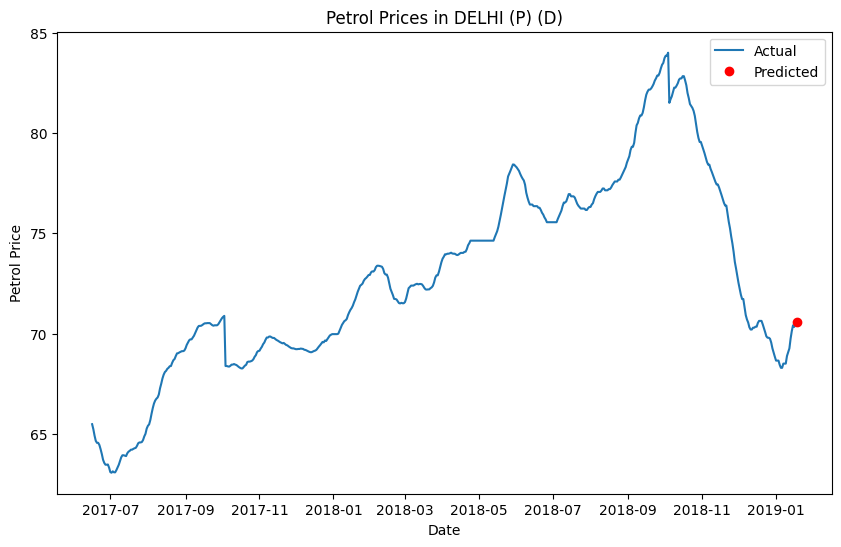

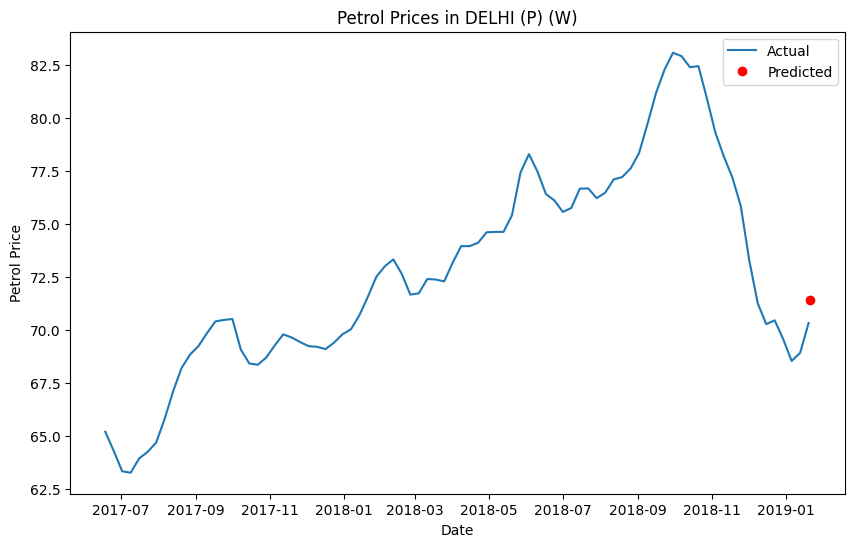

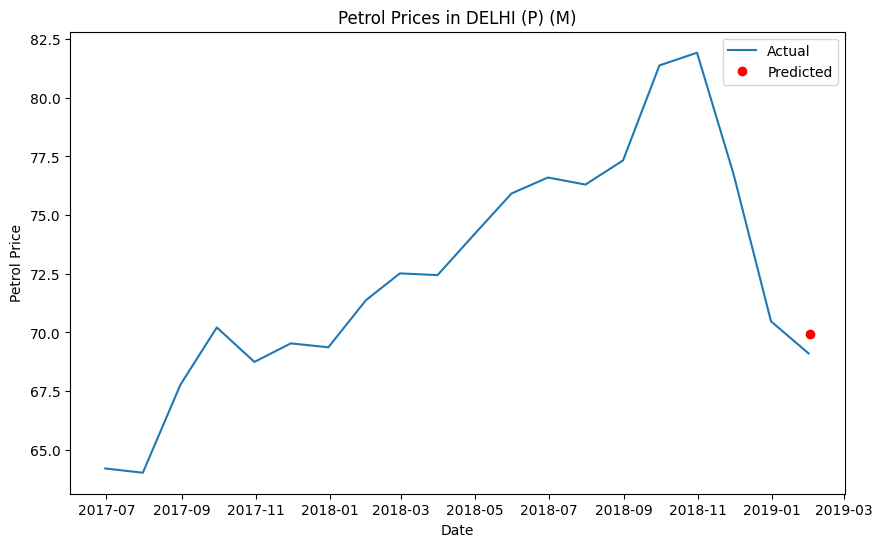

C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


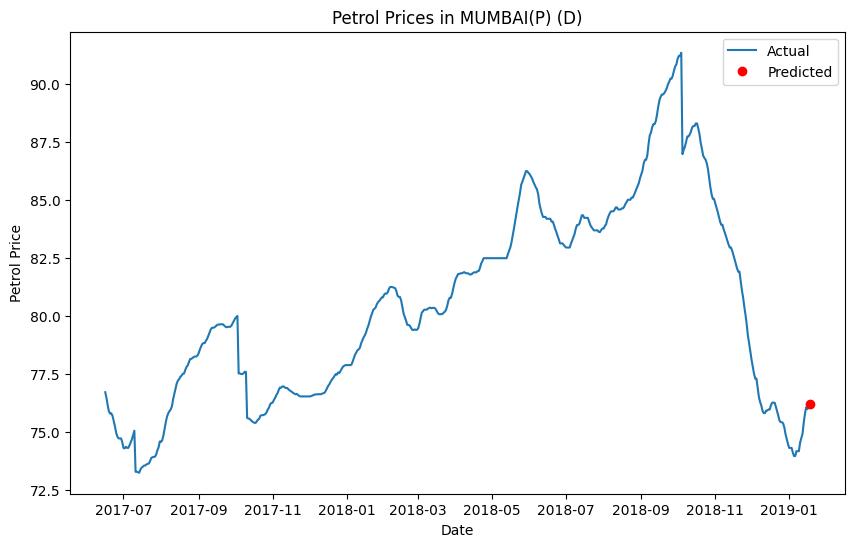

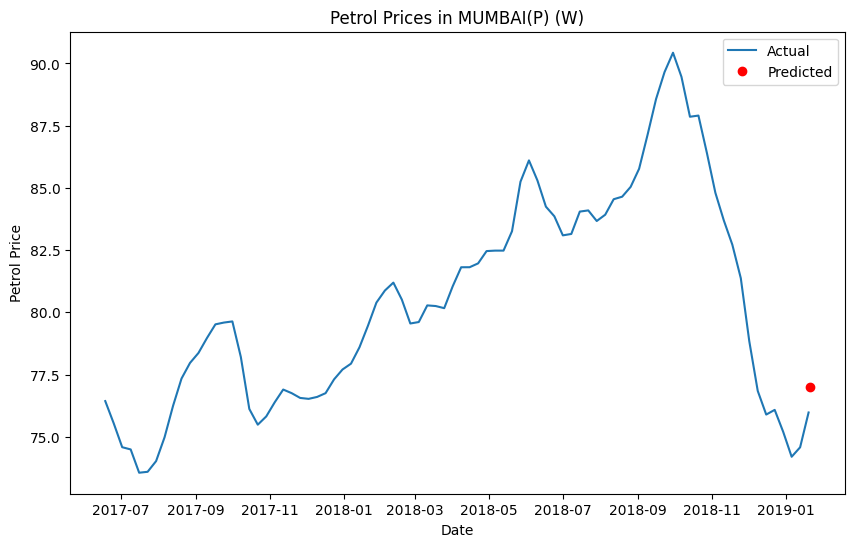

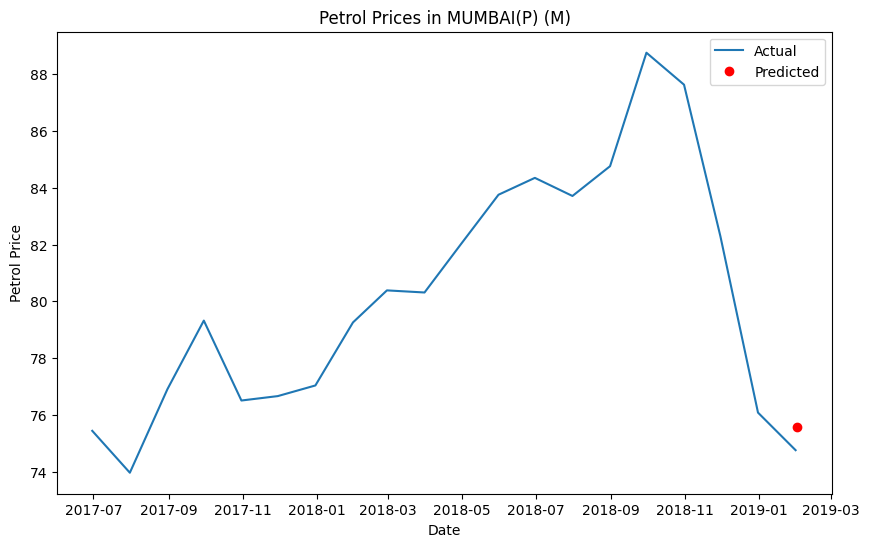

C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


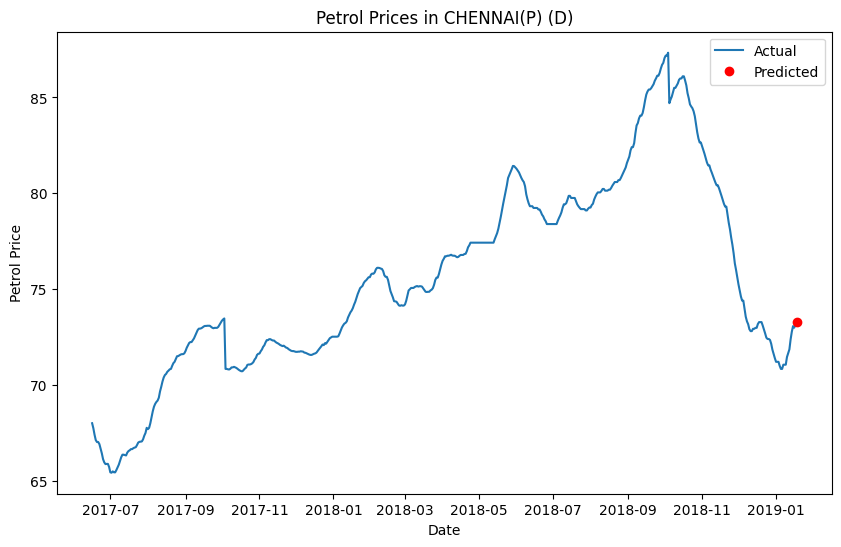

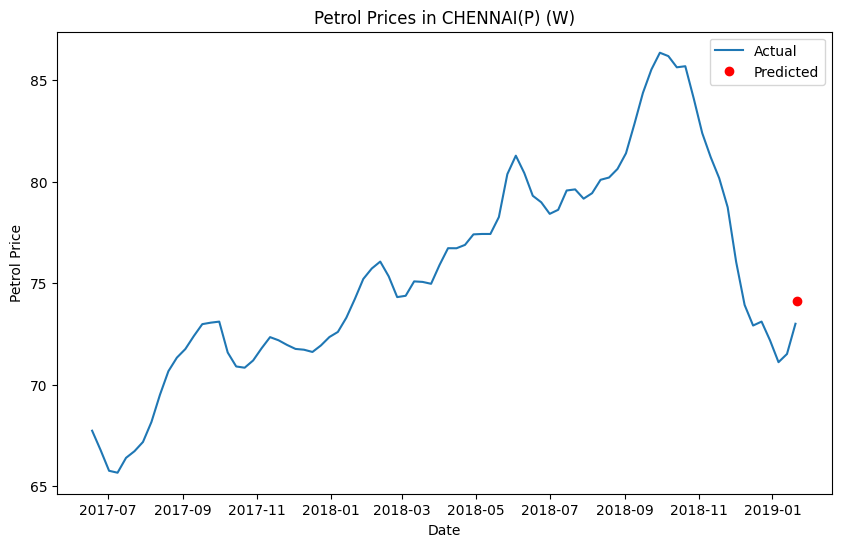

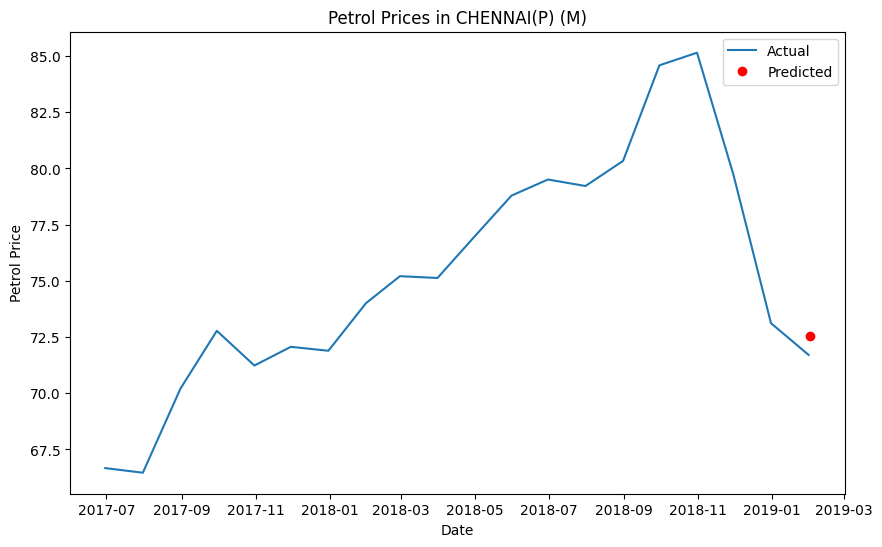

C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


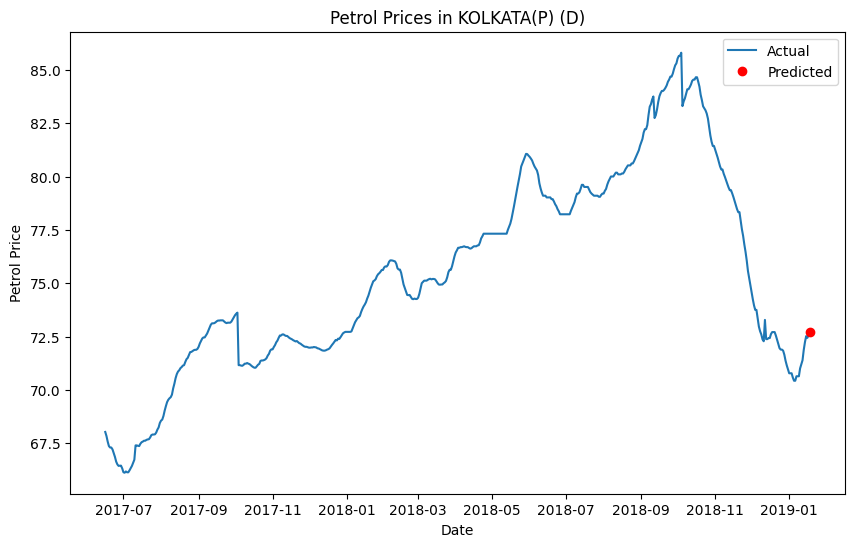

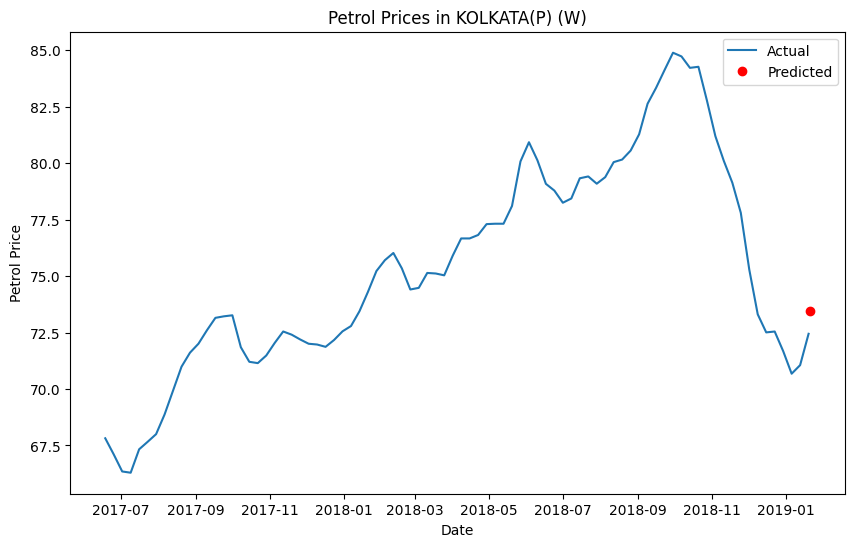

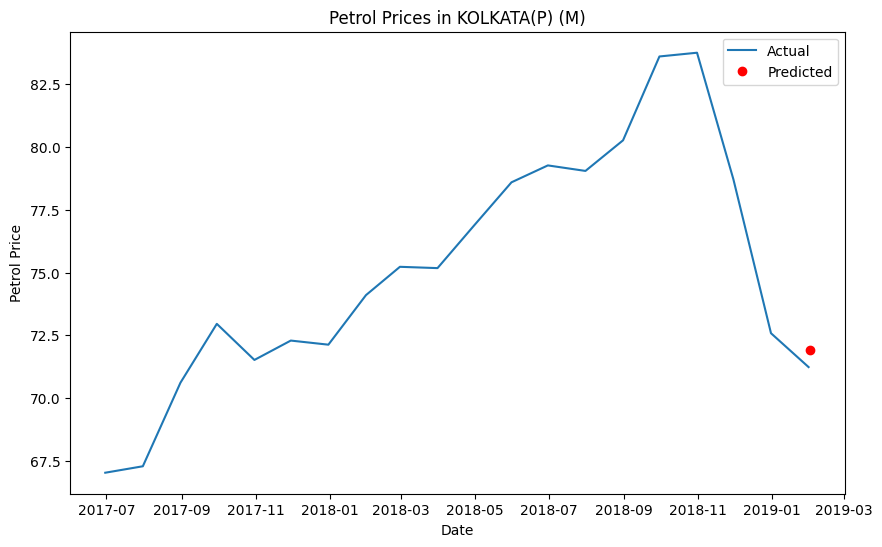

In [48]:
import matplotlib.pyplot as plt

# Function to plot the predicted and actual petrol prices
def plot_results(city, freq, next_values):
    # Get the data for the specified city
    city_data = petrol[city]
    
    # Convert the data to a time series
    time_series = pd.Series(city_data.values, index=petrol['DATE'])
    
    # Resample the data based on the specified frequency
    if freq == 'D':
        resampled_series = time_series
    elif freq == 'W':
        resampled_series = time_series.resample('W').mean()
    elif freq == 'M':
        resampled_series = time_series.resample('M').mean()
    else:
        raise ValueError("Invalid frequency. Please choose either 'D', 'W', or 'M'.")
    
    # Plot the predicted and actual petrol prices
    plt.figure(figsize=(10, 6))
    plt.plot(resampled_series.index, resampled_series.values, label='Actual')
    plt.plot(resampled_series.index[-1:] + pd.DateOffset(days=1), next_values, 'ro', label='Predicted')
    plt.title(f"Petrol Prices in {city} ({freq})")
    plt.xlabel('Date')
    plt.ylabel('Petrol Price')
    plt.legend()
    plt.show()

# Visualize the results for all four cities
for city in cities:
    for freq in frequencies:
        next_values = predict_petrol_price(city, freq)
        plot_results(city, freq, next_values)


Refining model for DELHI (P) (D)


C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


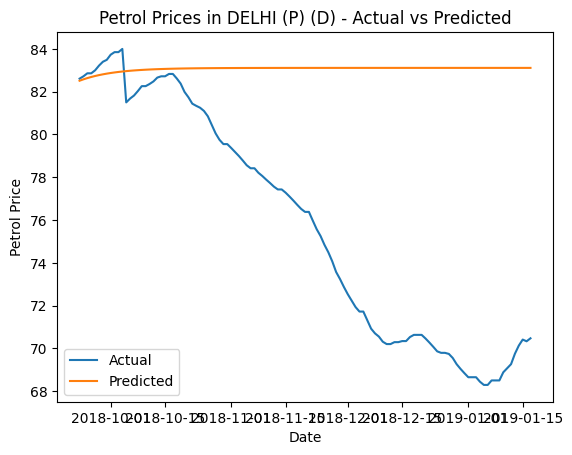

Mean Absolute Error (MAE): 7.393389419634637
Mean Squared Error (MSE): 83.01347007695092
Root Mean Squared Error (RMSE): 9.111172815667087
Refining model for DELHI (P) (W)


C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


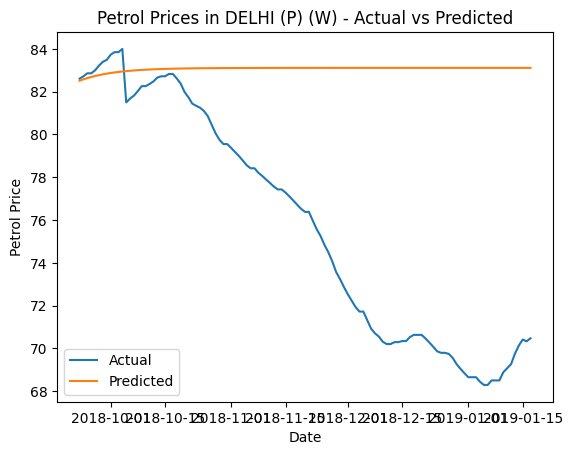

Mean Absolute Error (MAE): 7.393389419634637
Mean Squared Error (MSE): 83.01347007695092
Root Mean Squared Error (RMSE): 9.111172815667087
Refining model for DELHI (P) (M)


C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


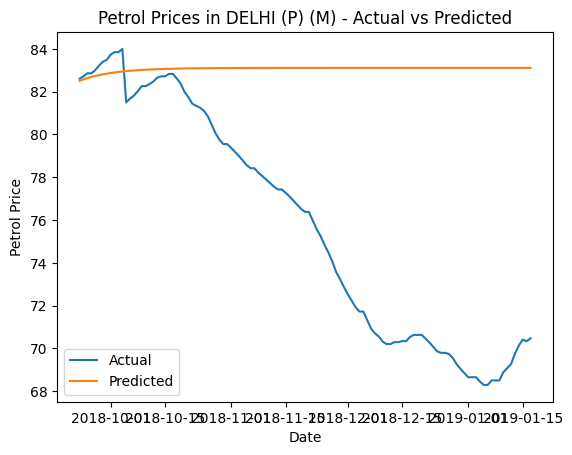

Mean Absolute Error (MAE): 7.393389419634637
Mean Squared Error (MSE): 83.01347007695092
Root Mean Squared Error (RMSE): 9.111172815667087
Refining model for MUMBAI(P) (D)


C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


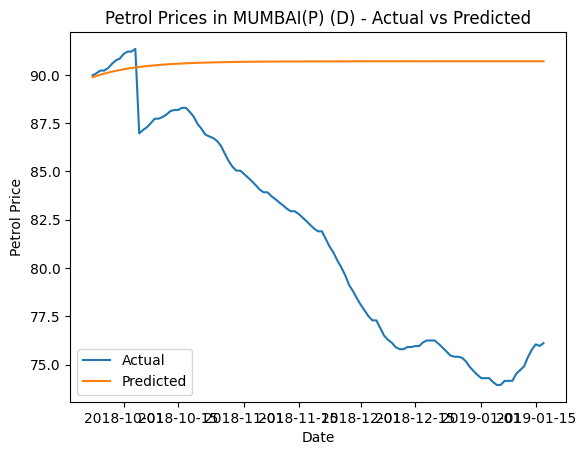

Mean Absolute Error (MAE): 9.19587210016912
Mean Squared Error (MSE): 115.83093437660003
Root Mean Squared Error (RMSE): 10.762478077868499
Refining model for MUMBAI(P) (W)


C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


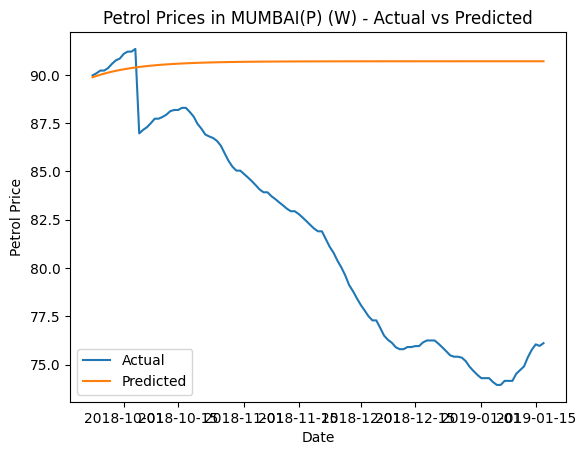

Mean Absolute Error (MAE): 9.19587210016912
Mean Squared Error (MSE): 115.83093437660003
Root Mean Squared Error (RMSE): 10.762478077868499
Refining model for MUMBAI(P) (M)


C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


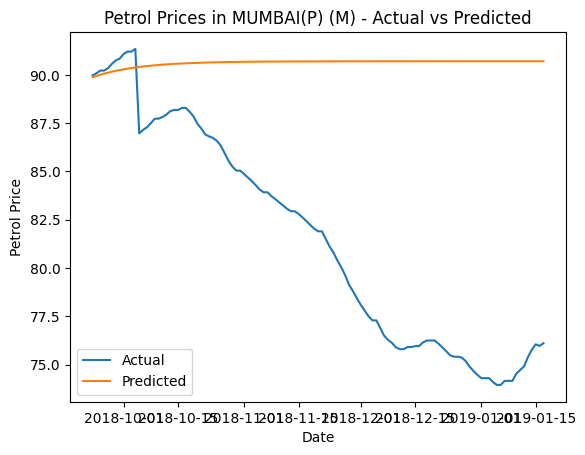

Mean Absolute Error (MAE): 9.19587210016912
Mean Squared Error (MSE): 115.83093437660003
Root Mean Squared Error (RMSE): 10.762478077868499
Refining model for CHENNAI(P) (D)


C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


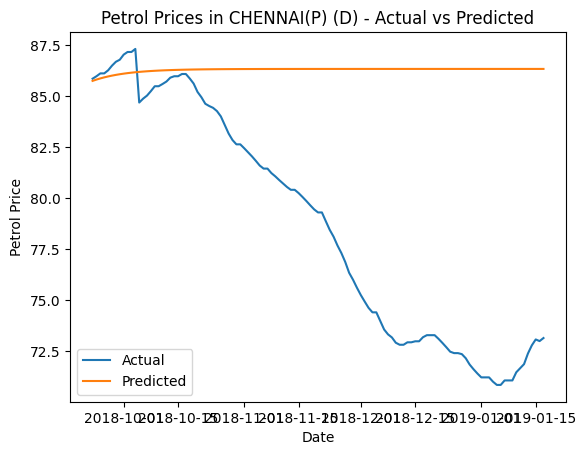

Mean Absolute Error (MAE): 7.726917957766184
Mean Squared Error (MSE): 90.82337212521787
Root Mean Squared Error (RMSE): 9.53012970138486
Refining model for CHENNAI(P) (W)


C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


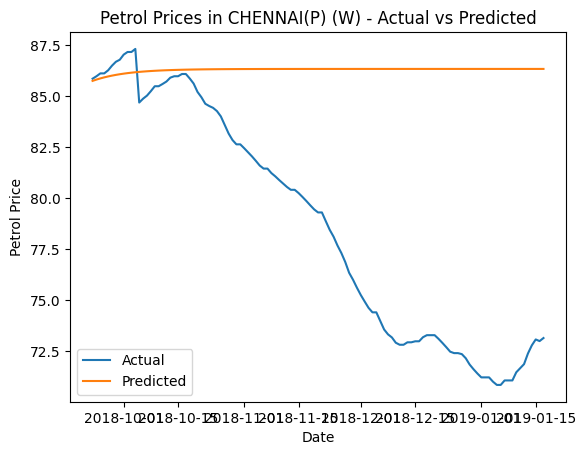

Mean Absolute Error (MAE): 7.726917957766184
Mean Squared Error (MSE): 90.82337212521787
Root Mean Squared Error (RMSE): 9.53012970138486
Refining model for CHENNAI(P) (M)


C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


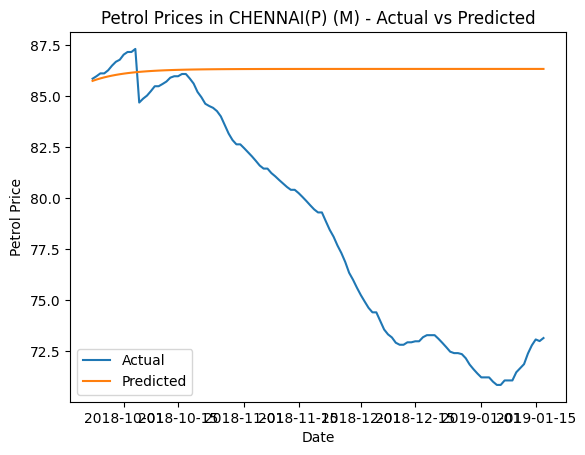

Mean Absolute Error (MAE): 7.726917957766184
Mean Squared Error (MSE): 90.82337212521787
Root Mean Squared Error (RMSE): 9.53012970138486
Refining model for KOLKATA(P) (D)


C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


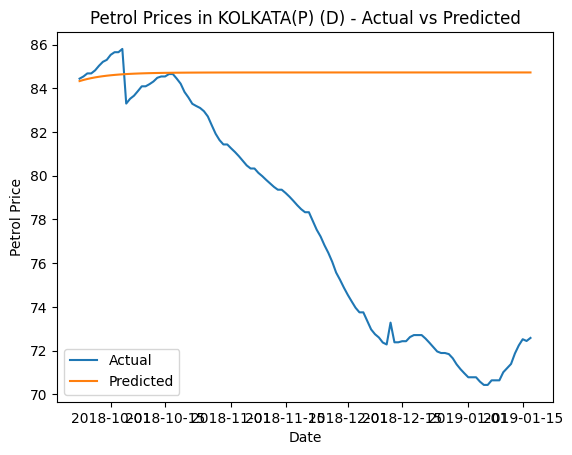

Mean Absolute Error (MAE): 7.061925830749674
Mean Squared Error (MSE): 76.46916167892165
Root Mean Squared Error (RMSE): 8.744664755090481
Refining model for KOLKATA(P) (W)


C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


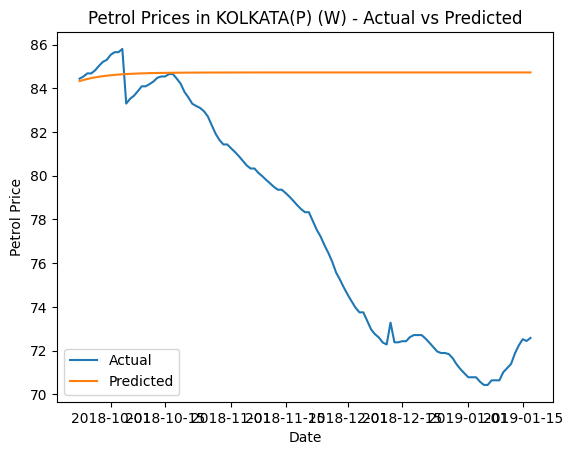

Mean Absolute Error (MAE): 7.061925830749674
Mean Squared Error (MSE): 76.46916167892165
Root Mean Squared Error (RMSE): 8.744664755090481
Refining model for KOLKATA(P) (M)


C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


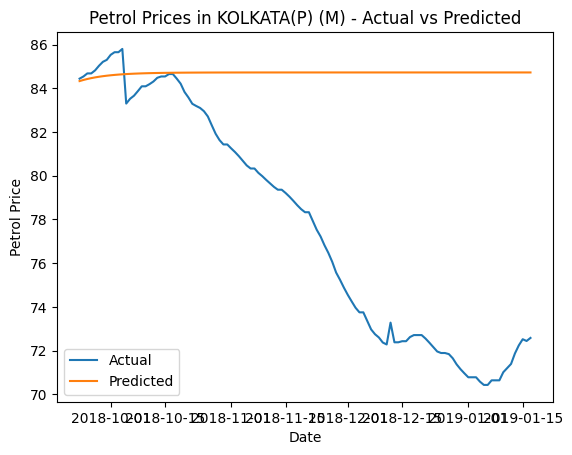

Mean Absolute Error (MAE): 7.061925830749674
Mean Squared Error (MSE): 76.46916167892165
Root Mean Squared Error (RMSE): 8.744664755090481


In [49]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Function to fit ARIMA model, generate predictions, and evaluate performance
def refine_arima_model(city, freq, p, d, q):
    # Get the data for the specified city
    city_data = petrol[city]
    
    # Convert the data to a time series
    time_series = pd.Series(city_data.values, index=petrol['DATE'])
    
    # Split the data into training and testing sets
    train_size = int(len(time_series) * 0.8)
    train_data, test_data = time_series[:train_size], time_series[train_size:]
    
    # Fit the ARIMA model to the training data
    model = ARIMA(train_data, order=(p, d, q))
    model_fit = model.fit()
    
    # Generate predictions on the testing data
    predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
    
    # Evaluate the performance of the model
    mae = mean_absolute_error(test_data, predictions)
    mse = mean_squared_error(test_data, predictions)
    rmse = mse ** 0.5
    
    # Visualize the actual and predicted values
    plt.plot(test_data.index, test_data.values, label='Actual')
    plt.plot(test_data.index, predictions, label='Predicted')
    plt.title(f"Petrol Prices in {city} ({freq}) - Actual vs Predicted")
    plt.xlabel('Date')
    plt.ylabel('Petrol Price')
    plt.legend()
    plt.show()
    
    # Print the evaluation metrics
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

# Refine the model for all four cities
for city in cities:
    for freq in frequencies:
        print(f"Refining model for {city} ({freq})")
        refine_arima_model(city, freq, p=1, d=1, q=1)


In [50]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming `data` is your time series data with the given column names
frequency = 'D'  # Set the appropriate frequency here

petrol['date'] = pd.date_range(start='2000-01-01', periods=len(petrol), freq=frequency)
petrol.set_index('date', inplace=True)

cities = ['DELHI (P)', 'MUMBAI(P)', 'CHENNAI(P)', 'KOLKATA(P)']

for city in cities:
    city_data = petrol[[city]].copy()
    city_data.index.freq = frequency
    
    # Refining the model for the current city
    model = ARIMA(city_data[city], order=(1, 1, 1))
    model_fit = model.fit()
    
    print(f"Summary for {city}:")
    print(model_fit.summary())
    print("\n")


Summary for DELHI (P):
                               SARIMAX Results                                
Dep. Variable:              DELHI (P)   No. Observations:                  581
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 158.993
Date:                Sat, 24 Jun 2023   AIC                           -311.986
Time:                        10:30:06   BIC                           -298.897
Sample:                    01-01-2000   HQIC                          -306.883
                         - 08-03-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9095      0.037     24.619      0.000       0.837       0.982
ma.L1         -0.6963      0.039    -17.761      0.000      -0.773      -0.619
sigma2         0.0338      0.

In [51]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Define the order for the ARIMA model
order = (1, 1, 1)

# Create an empty dictionary to store the model results
model_results = {}

# Iterate over each city
for city in cities:
    # Select the data for the current city
    city_data = petrol[city].copy()
    
    # Fit the ARIMA model
    model = ARIMA(city_data, order=order)
    model_fit = model.fit()
    
    # Store the model results in the dictionary
    model_results[city] = model_fit

# Access the model results for a specific city
delhi_results = model_results['DELHI (P)']
mumbai_results = model_results['MUMBAI(P)']
chennai_results = model_results['CHENNAI(P)']
kolkata_results = model_results['KOLKATA(P)']

In [52]:
# Specify the number of periods to forecast
n_periods = 12  # For example, forecast for the next 12 periods

# Generate forecasts for each city
delhi_forecast = delhi_results.forecast(steps=n_periods)
mumbai_forecast = mumbai_results.forecast(steps=n_periods)
chennai_forecast = chennai_results.forecast(steps=n_periods)
kolkata_forecast = kolkata_results.forecast(steps=n_periods)

In [53]:
# Save the models
delhi_results.save('delhi_model.pkl')
mumbai_results.save('mumbai_model.pkl')
chennai_results.save('chennai_model.pkl')
kolkata_results.save('kolkata_model.pkl')

from statsmodels.tsa.arima.model import ARIMAResults

# Load the models
delhi_model = ARIMAResults.load('delhi_model.pkl')
mumbai_model = ARIMAResults.load('mumbai_model.pkl')
chennai_model = ARIMAResults.load('chennai_model.pkl')
kolkata_model = ARIMAResults.load('kolkata_model.pkl')